# Определение возраста покупателей

## Исследовательский анализ данных

Импортируем библиотеки:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, MaxPool2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

Сохраним фото в датасет

In [5]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


Разделим датасет на features и target

In [11]:
features, target = next(train_gen_flow)


Просмотрим 16  фото с указанием возраста:

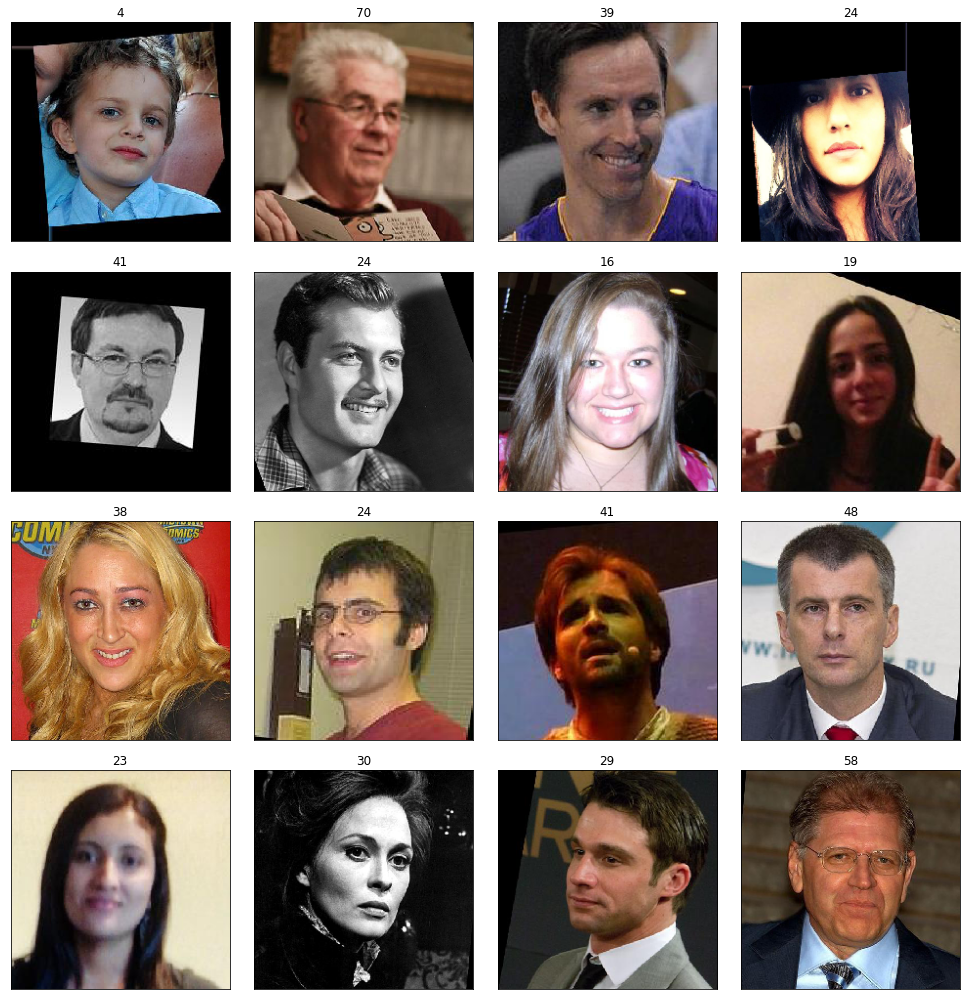

In [12]:
fig = plt.figure(figsize=(14,14))
for i in range(16):
    fig.add_subplot(4,4,i+1)
    plt.imshow(features[i])
    plt.title(target[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Построим гисторграмму распрееделения возраста:

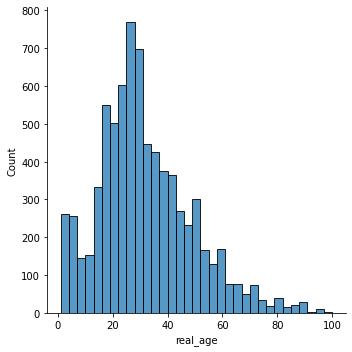

In [20]:
sns.displot(labels['real_age'], binwidth = 3)

plt.show()

**Вывод:** Судя по фотографиям аугументация уже была произведена, так как имеются фото в разных цветовых гаммах и со смещениями. Так же по гистограмме можно сказать, что на данном датасете не получится получить идеальную модель распознования всех возростов, так как фотографий лиц старше 80 очень мало.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense,GlobalAveragePooling2D  
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.resnet import ResNet50 
import numpy as np 
import pandas as pd 
import seaborn as sns    
optimizer = Adam(lr=0.0001)   
def load_train(path):     
    labels = pd.read_csv(path+'labels.csv')      
    train_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.25)      
    train_datagen_flow = train_datagen.flow_from_dataframe(         
      dataframe = labels,         
      directory = path + 'final_files/',         
      x_col='file_name',         
      y_col='real_age',         
      target_size=(224, 224),         
      batch_size=32,         
      class_mode='raw',         
      subset='training',         
      horizontal_flip=True,         
      seed=42)     
    return train_datagen_flow  
def load_test(path):     
    labels = pd.read_csv(path+'labels.csv')      
    test_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.25)      
    test_datagen_flow = test_datagen.flow_from_dataframe(         
        dataframe = labels,         
        directory = path + 'final_files/',         
        x_col='file_name',         
        y_col='real_age',         
        target_size=(224, 224),         
        batch_size=32,         
        class_mode='raw',         
        subset='validation',          
        seed=42)      
    return test_datagen_flow  
def create_model(input_shape):      
    backbone = ResNet50(input_shape= input_shape,                     
                        weights='imagenet',                      
                        include_top= False)      
    model = Sequential()     
    model.add(backbone)     
    model.add(GlobalAveragePooling2D())     
    model.add(Dense(1, activation='relu'))      
    model.compile(optimizer=optimizer, 
                  loss='mean_squared_error',metrics=['mae'])      
    return model   
def train_model(model, train_data, test_data, batch_size=None, epochs=10,                 
                steps_per_epoch=None, validation_steps=None):      
                if steps_per_epoch is None:         
                  steps_per_epoch = len(train_data)     
                if validation_steps is None:         
                  validation_steps = len(test_data)     
                  model.fit(train_data,                
                            validation_data= test_data,               
                            batch_size=batch_size, epochs=epochs,               
                            steps_per_epoch=steps_per_epoch,               
                            validation_steps=validation_steps,               
                            verbose=2)     
                return model

```

Train for 178 steps, validate for 60 steps

Epoch 1/10

178/178 - 65s - loss: 249.1309 - mae: 11.2676 - val_loss: 895.8745 - val_mae: 24.9728

Epoch 2/10

178/178 - 36s - loss: 59.8478 - mae: 5.8681 - val_loss: 782.5406 - val_mae: 22.9142

Epoch 3/10

178/178 - 36s - loss: 30.0982 - mae: 4.2636 - val_loss: 303.5195 - val_mae: 12.7822

Epoch 4/10

178/178 - 36s - loss: 20.3659 - mae: 3.4811 - val_loss: 139.7030 - val_mae: 8.9142

Epoch 5/10

178/178 - 36s - loss: 16.7981 - mae: 3.2025 - val_loss: 83.5162 - val_mae: 6.8762

Epoch 6/10


178/178 - 36s - loss: 15.1630 - mae: 3.0029 - val_loss: 70.9611 - val_mae: 6.3527

Epoch 7/10

178/178 - 36s - loss: 12.1793 - mae: 2.6618 - val_loss: 71.8313 - val_mae: 6.5635

Epoch 8/10

178/178 - 36s - loss: 9.4379 - mae: 2.3456 - val_loss: 86.0298 - val_mae: 6.9429

Epoch 9/10

178/178 - 36s - loss: 7.8068 - mae: 2.1170 - val_loss: 73.8900 - val_mae: 6.6728

Epoch 10/10

178/178 - 36s - loss: 6.7084 - mae: 1.9706 - val_loss: 66.8975 - val_mae: 6.1138

60/60 - 9s - loss: 66.8975 - mae: 6.1138

Test MAE: 6.1138

## Анализ обученной модели

Для того чтобы считать модель успешной верхний порог МАЕ был задан на отметке 8.0, в итоговой модели получили 6.11. 